![alttext](logo.png)

### Team Tomato: Gustavo Morales - Eduardo López
### Generación :  G10
### Profesores : Heriberto Briceño - Giannina Salomo 
### Fecha : Lunes 2 de Marzo de 2020

▣ Hito 1: Preliminares y aspectos computacionales.\
▣ Hito 2: Análisis exploratorio e ingeniería de atributos.\
▢ Hito 3: Modelación descriptiva.\
▢ Hito 4: Modelación predictiva.

# H1: Preliminares y aspectos computacionales

### Descripción del problema 
Se solicita que mediante el estudio de un gran número de tweets, se puedan clasificar si estos pertenecen a la categoría de "Positivo" o "Negativo". Ejemplos de tweets positivos son aquellos relacionados a atributos como:
* `happines`, `love`, `surprise`, `fun`, `relief`, `enthusiasm`.

En el caso de tweets negativos, tendríamos por ejemplo:
* `worry`, `sadness`, `hate`, `empty`, `boredom`, `anger`.

### Objetivo
Evaluar múltiples modelos de clasificación de tweets para predecir si pertenecen a una u otra de dichas categorías.

### Solución
Analizar distintos modelos de clasificación. Una vez entrenados y puestos a prueba, serán calificados y comparados entre sí para definir qué modelo es más exacto y preciso al momento de clasificar. Una vez hecho esto se llevará a cabo el paso fundamental de definir la clase correspondiente a un tweet especifico.

A fin de mejorar el rendimento al momento de predecir, se recurrirá a dos técnicas de preprocesamiento de datos de este tipo: _tokenización_ y _lematización_. La primera hace referencia a discriminar _tokens_ ("palabras" definidas según algún criterio simple dentro de un cuerpo de texto más grande) que tengan valor linguístico, y la segunda a un proceso que consiste en eliminar formas linguísticas de dichas palabras con el fin de agrupar las morfológicamente idénticas o similares. El objetivo de la _lematización_ es reducir las palabras a su raíz lingúistica básica, reduciendo los datos que no aportan valor estadístico. El proceso de _stemming_ tiene el mismo objetivo, y consiste en simplemente cortar palabras que tengan la misma raíz. Dicha técnica fue desechada en favor de la _lematización_ por considerarla más cruda y propensa a fallos (por ejemplo, con carrot y cartoon).

### Métricas de desempeño
Las métricas de desempeño caracterizan la eficiencia de nuestros modelos. Antes de presentar soluciones estrictamente cuantitativas se procederá a graficar las variables consideradas relevantes para la solución de este problema, mostrando gráficos de distribución relevantes al problema.

Para el caso de clasificación se utilizaran las siguientes metricas de desempeño:
* `precision`: la exactitud se define como la cantidad de predicciones positivas que fueron correctas.
* `recall`: el porcentaje de casos positivos detectados.
* `accuracy`: la fracción de predicciones correctas entre el número total de registros.
* `F1-score`: para cuantificar el balance entre `precision` y `recall`.
* `ROC curve`: es más bien un gráfico de apoyo, útil para visualizar la capacidad de diagnóstico de un clasificador binario. Similarmente, el área bajo la curva ROC, `AUC score`, cuantifica el poder del modelo para discriminar entre dos clases.

### Aspectos computacionales

Para la ingesta y preprocesamiento de datos se utilizarán las librerías de `numpy` y `pandas`. Para la visualización de datos se utilizarán las librerías de `matplotlib` y `seaborn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use('seaborn')

Para el desarrollo de técnicas de aprendizaje de máquina, las librerías a continuación facilitarán la creación de modelos en base a la predicción de un vector objetivo utilizando modelos de clasificación. El problema corresponde a aprendizaje supervisado, por lo que proponemos utilizar los siguientes modelos. Para aquellos que se beneficien de una búsqueda de grilla previa, se especifican sus respectivos hiperparámetros (tentativos):

   * Bernoulli Naive-Bayes
   * AdaBoostClassifier
        * Hiperparametros: 
        ```python 
           ada_params = {
               'learning_rate': [0.01, 0.1, 0.5],  # shrinks the contribution of each classifier
               'n_estimators': [50, 100, 500, 1000, 2000]  # max number of estimators at which boosting is terminated
           }
        ```
   * DecisionTreeClassifier
        * Hiperparametros: 
        ```python
           max_depth = 4  # maximum depth of the tree
        ```
   * LogisticRegression
       * Hiperparametros: 
        ```python
           C = 2  # regularization strength, smaller values specify stronger regularization
        ```
   * SVC
        * Hiperparametros:
        ```python
           params = {
               'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # regularization parameter, l2 penalty
               'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]  # kernel coefficient
           }
        ```
   
#### Selección de submuestras
   * Usaremos el método `train_test_split`, que divide la matriz de datos de manera aleatoria, generando sets de entrenamiento y prueba. Utilizaremos un 33% del total para la muestra de entrenamiento y el resto para la muestra de prueba, con una semilla pseudoaleatoria con valor 63.

#### Módulos para implementación de modelos 

In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#### Módulos para selección y medición de desempeño de modelos

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

#### Módulo para optimizar, organizar y concatenar procesos de aprendizaje en modelos

In [4]:
from sklearn.pipeline import Pipeline

#### Módulo para búsqueda y selección automática de hiperparámetros

In [5]:
from sklearn.model_selection import GridSearchCV

#### Módulos para serialización de objetos y filtro advertencias

In [6]:
import pickle
import warnings
warnings.filterwarnings("ignore")

# H2: Análisis exploratorio e ingeniería de atributos

### Ingeniería de atributos (_Feature Engineering_)

In [7]:
df = pd.read_csv("text_emotion.csv")

Primero observamos el set de datos y revisamos su integridad:

In [8]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


Notar que NO existen valores perdidos (NaN).

Para el preprocesamiento del vector objetivo, definimos primero una función pertinente que se encarga de capitalizar todo el texto en minúscula, luego filtra todo lo que no sea letra, y finalmente aplica una _lematización_. Este último paso utiliza el modelo `en_core_web_sm` de `spacy`, entrenado para efectuar la reducción.

In [10]:
import spacy
import re
from nltk.corpus import stopwords

nlp = spacy.load('en_core_web_sm')  # English multi-task CNN trained on OntoNotes.

def preproc_text(text):
    """Transform input text to improve modeling, including capitalization, filtering, and lemmatization.

    Args:
    text (str): Text content
    
    Returns:
    text (str): Transformed text content
    """
    text = text.lower()
    text = re.sub('[^a-z]+',' ',text)
    text = ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in nlp(text)])
    return text

#### Ejemplo de Lemmatización
La lematización funciona reduciendo las palabras a una raíz linguística dada.

In [11]:
text = 'I he she became going did made make'
textl = [token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in nlp(text)]
print('Texto sin lematizar: ', text)
print('-------------------------')
print('Texto lematizado: ', textl)

Texto sin lematizar:  I he she became going did made make
-------------------------
Texto lematizado:  ['I', 'he', 'she', 'become', 'go', 'do', 'make', 'make']


### Frencuencia de categorías
Una vez procesado el texto, analizamos la frecuencia de categorías en el texto:

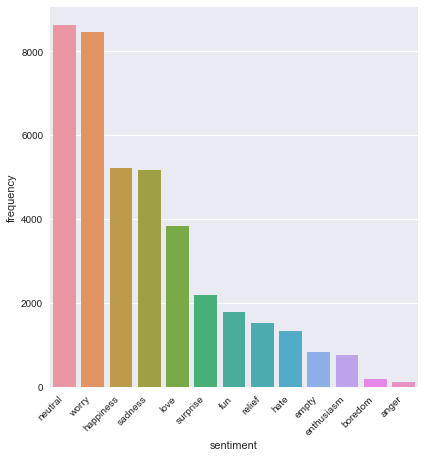

In [12]:
sent = df['sentiment'].value_counts().index.tolist()
sent_frec = df['sentiment'].value_counts().tolist()

df_sent = pd.DataFrame({'sentiment':sent, 'frequency':sent_frec})

ax = sns.catplot(x = 'sentiment', y = 'frequency', kind = 'bar', height = 6, data = df_sent);
ax.set_xticklabels(rotation = 45, horizontalalignment = 'right');


### Recodificación:
En este punto podemos hacer una recodificación del vector objetivo conteniendo una clasificación binaria: sentimiento Positivo y Negativo.

In [13]:
df.replace(to_replace = "worry",value = "Negativa", inplace = True)
df.replace(to_replace = "happiness",value = "Positiva", inplace = True)
df.replace(to_replace = "sadness",value = "Negativa", inplace = True)
df.replace(to_replace = "love",value = "Positiva", inplace = True)
df.replace(to_replace = "surprise",value = "Positiva", inplace = True)
df.replace(to_replace = "fun",value = "Positiva", inplace = True)
df.replace(to_replace = "relief",value = "Positiva", inplace = True)
df.replace(to_replace = "hate",value = "Negativa", inplace = True)
df.replace(to_replace = "empty",value = "Negativa", inplace = True)
df.replace(to_replace = "enthusiasm",value = "Positiva", inplace = True)
df.replace(to_replace = "boredom",value = "Negativa", inplace = True)
df.replace(to_replace = "anger",value = "Negativa", inplace = True)

A continuación decidimos borrar los tweets clasificados como neutrales porque de acuerdo a nuestra clasificación binaria de Positivo vs Negativo, una clasificación Neutral se puede entender como ruido para el modelo, o similarmente, un dato nulo.

In [14]:
df = df.drop(df[df.sentiment == 'neutral'].index)

# Para aleatorizar categoria "neutral"
#for i, row in df["sentiment"].iteritems():
    #if row == "neutral":
        #df["sentiment"][i] = np.random.choice(choice_sent)

In [15]:
df['sentiment'].value_counts()

Negativa    16063
Positiva    15299
Name: sentiment, dtype: int64

### Tokenización
A continuación realizamos el proceso de _tokenización_, cuyo objetivo es discriminar palabras entre sí.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto CountVectorizer con nuestra función
count_vectorizer = CountVectorizer(preprocessor = preproc_text, stop_words = 'english') 
# implementamos los pasos de fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df['content'])
# extraemos los tokens (palabras)
words = count_vectorizer.get_feature_names()
# y ahora extraemos la frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [17]:
df_words = pd.DataFrame({'words':words, 'frequency':words_freq})

El resultado de la tokenización y su frecuencia es:

In [18]:
df_words

,words,frequency
0,aa,3
1,aaa,2
2,aaaa,1
3,aaaaa,1
4,aaaaaaaa,1
...,...,...
34246,zzz,2
34247,zzzz,2
34248,zzzzy,1
34249,zzzzz,1


Con ello, las 10 palabras mas repetidas de todo el data set de la columna 'content' está dado por:

In [19]:
df_words.sort_values("frequency", ascending = False).head(10)

,words,frequency
7130,day,3203
15566,just,2614
11568,good,2336
17825,love,1827
33257,work,1727
17270,like,1710
24265,quot,1469
30484,today,1390
12305,happy,1390
13227,http,1284


### Primera iteración de Modelación

A continuación entrenaremos los modelos a desarrollar:

#### **Ada Boost Classifier**

In [20]:
X = count_vectorizer_fit
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=63)

* Hiperparametros para el clasificador AdaBoost:

In [21]:
ada_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}

A continuación ejecutamos la siguiente búsqueda de grilla para determinar los mejores hiperparámetros dentro de dicha grilla. Dado que toma un tiempo considerable, decidimos guardar el resultado y cargarlo en una instancia de `pickle`.

```python
ada_model = GridSearchCV(AdaBoostClassifier(random_state = 63), ada_params,
                             cv = 2).fit(X_train, y_train)
```

In [22]:
ada_model = pickle.load(open('adamodel_prueba1.sav', 'rb'))

De esta forma, la mejor selección de hiperparámetros está dada por:

In [23]:
print(ada_model.best_params_)

{'learning_rate': 0.1, 'n_estimators': 2000}


Con lo cual las métricas de clasificación para el modelo entrenado son:

In [24]:
print(classification_report(y_test, ada_model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

    Negativa       0.70      0.81      0.75      5346
    Positiva       0.75      0.63      0.68      5004

    accuracy                           0.72     10350
   macro avg       0.73      0.72      0.72     10350
weighted avg       0.72      0.72      0.72     10350



#### **Bernoulli Naive Bayes**

In [25]:
X = df['content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=63)

Luego realizamos el siguiente _pipeline_ con el método de Naive Bayes, en donde primero procesamos el texto de acorde a las directivas anteriores, y luego entrenamos. Por la misma razón del modelamiento anterior, decidimos guardar el resultado para su posterior uso:

```python
nb_model = Pipeline(
    [
        ( 'count_vectorizer', CountVectorizer(preprocessor=preproc_text, stop_words='english') ),
        ( 'naive_bayes', BernoulliNB() )
    ]
)

nb_model.fit(X_train, y_train)
```

In [26]:
nb_model = pickle.load(open("nbmodel_prueba1.sav", 'rb'))

Finalmente, el rendimiento para este caso está dado por:

In [27]:
print(classification_report(y_test, nb_model.predict(X_test)))

              precision    recall  f1-score   support

    Negativa       0.71      0.79      0.74      5346
    Positiva       0.74      0.65      0.69      5004

    accuracy                           0.72     10350
   macro avg       0.72      0.72      0.72     10350
weighted avg       0.72      0.72      0.72     10350



Podemos testear la predicción de la siguiente forma, arrojando clasificaciones bastante razonables:

In [28]:
pred_list = ["what the fuck", "I'm happy", "I'm angry", 
             "I'm sad", "Who cares", "How to become a super hero"]

In [29]:
list(nb_model.predict(pred_list))

['Negativa', 'Positiva', 'Negativa', 'Negativa', 'Negativa', 'Negativa']

# Hito 3 (WIP)

## Logistic Regression

In [30]:
log_model = Pipeline([("count_vectorizer", CountVectorizer(preprocessor = preproc_text,
                                                            stop_words = "english")),
                          ("log_regression", LogisticRegression())])

In [31]:
log_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1),
                                 preprocessor=<function preproc_text at 0x7f0e4788c8c8>,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('log_regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10

In [32]:
print(classification_report(y_test, log_model.predict(X_test)))

              precision    recall  f1-score   support

    Negativa       0.73      0.76      0.74      5346
    Positiva       0.73      0.70      0.71      5004

    accuracy                           0.73     10350
   macro avg       0.73      0.73      0.73     10350
weighted avg       0.73      0.73      0.73     10350



### SVC 

#### Hiperparametros 

In [33]:
params = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          "gamma": [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

params_2 = {"C": [0.0001, 100],
           "gamma": [0.00001, 10]}